In [11]:
import pandas as pd
import json
from warnings import filterwarnings as _fw_

In [12]:
df = pd.read_csv('df.csv', encoding='utf-8').drop(columns='Unnamed: 0')
# df

In [13]:
with open('binary_columns.json', 'r', encoding='utf-8') as file:
    binary_columns = json.load(file)
# binary_columns[:-2]

In [14]:
target = binary_columns[0:13]
school_head5 = binary_columns[14:30]
school_tail5 = binary_columns[31:46]
course = binary_columns[47:56]
profession = binary_columns[57:66]

In [15]:
dfc = df[binary_columns[:-2]]

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(dfc, 'ward', 'euclidean')

In [17]:
# link[:5]

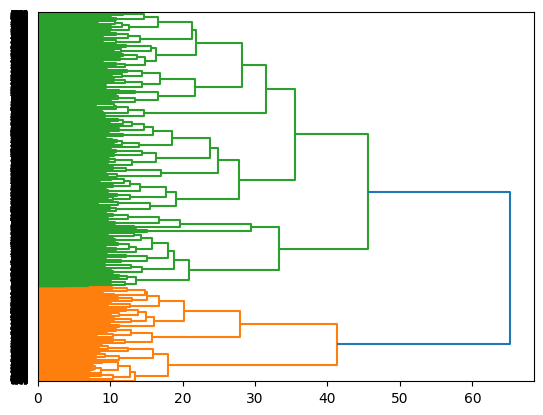

In [18]:
dn = dendrogram(link, orientation='right')

In [19]:
_fw_('ignore')
dfc.loc[:, 'cluster'] = fcluster(link, t=30, criterion='distance')
_fw_('default')

In [20]:
*clusters, = range(1, dfc.cluster.nunique() + 1)
categories = [target, school_head5, school_tail5, course, profession]
clusters_dictionary = {}
FX = lambda x: dfc.groupby('cluster').mean().loc[:, x].idxmax(axis=1)
for i_cluster in clusters:
    clusters_dictionary[i_cluster] = {'target': FX(categories[0])[i_cluster],
                                      'school_head5': FX(categories[1])[i_cluster],
                                      'school_tail5': FX(categories[2])[i_cluster],
                                      'course': FX(categories[3])[i_cluster],
                                      'profession': FX(categories[4])[i_cluster]}
clusters_dictionary

{1: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Возможность учиться в любое удобное время',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 2: {'target': 'TARGET Для саморазвития',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое удобное время',
  'school_tail5': 'SCHOOL_TAIL5 Истории успеха выпускников',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 3: {'target': 'TARGET Перейти на удаленную работу',
  'school_head5': 'SCHOOL_HEAD5 Помощь в трудоустройстве',
  'school_tail5': 'SCHOOL_TAIL5 Отсутствие установленных сроков сдачи работ',
  'course': 'COURSE Аналитик данных',
  'profession': 'PROFESSION Возможность работать удаленно'},
 4: {'target': 'TARGET Сменить работу и сферу деятельности',
  'school_head5': 'SCHOOL_HEAD5 Возможность учиться в любое 

In [21]:
dfc.groupby('cluster').size()

cluster
1     981
2    1539
3    1421
4     513
5    2503
6     390
7    2412
dtype: int64